In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
df = pd.read_csv("./perceptron.csv")
df.head()

,x1,x2,y
0,1.028503,0.973218,-1.0
1,0.252505,0.955872,-1.0
2,1.508085,0.672058,-1.0
3,1.940002,1.721370,-1.0
4,-1.048819,-0.844999,1.0


[]

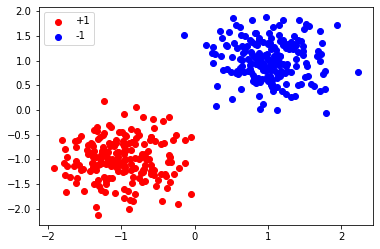

In [4]:
plt.scatter(df[df["y"] == 1]["x1"], df[df["y"] == 1]["x2"], c="red")
plt.scatter(df[df["y"] == -1]["x1"], df[df["y"] == -1]["x2"], c="blue")
plt.legend(["+1", "-1"])
plt.plot()

In [5]:
w = tf.Variable(np.random.randn(1, 2), dtype=tf.float64)
b = tf.Variable(0., dtype=tf.float64)

x = np.array(df[["x1", "x2"]].astype(float)).reshape(-1, 2)
y = np.array(df["y"].astype(int)).reshape(-1, 1)
y[y < 1] = 0

In [6]:
def pred(x):
    y_pred = w @ x.T + b
    return tf.cast(y_pred < 0, dtype=tf.float32)

In [7]:
def loss(y, y_hat):
    return tf.reduce_sum(tf.cast(y_hat != y.T, dtype=tf.float32))

In [8]:
# y_hat = pred(x)
# print(loss(y, y_hat))

# print(f"loss = {l}, w = {w.numpy()}, b = {b.numpy()}")

In [13]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, in_fetures, out_features, **kwargs):
        super().__init__(**kwargs)
        
        self.w = tf.Variable(tf.random.normal([in_fetures, out_features]))
        self.b = tf.Variable(tf.zeros([out_features]))
    
    def call(self, x):
        y = tf.matmul(x, self.w) + self.b
        return tf.nn.relu(y)

In [14]:
class Net(tf.keras.Model):
    def __init__(self, in_feature, out_feature, **kwargs):
        super().__init__(**kwargs)
        
        self.fc1 = MyDense(in_feature, out_feature)
    
    def call(self, x):
        return self.fc1(x)

In [15]:
net = Net(2, 1)

In [22]:
net.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.1),
    metrics=["accuracy"],
)

history = net.fit(x, y, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 